In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import matplotlib.pyplot as plt


In [2]:
chicago_taxi_dataset = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv')

In [3]:
training_df = chicago_taxi_dataset[['TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE']]

In [4]:
training_df.head()

,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0


In [17]:
training_df.describe(include='all')

,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [6]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRIP_MILES    31694 non-null  float64
 1   TRIP_SECONDS  31694 non-null  int64  
 2   FARE          31694 non-null  float64
 3   COMPANY       31694 non-null  object 
 4   PAYMENT_TYPE  31694 non-null  object 
 5   TIP_RATE      31694 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.5+ MB


What is the maximum fare?

In [21]:
training_df['FARE'].max()

np.float64(159.25)

What is the mean distance across all trips?

In [22]:
training_df['TRIP_MILES'].mean()

np.float64(8.289462674323214)

How many cab companies are in the dataset?

In [11]:
training_df['COMPANY'].nunique()

31

What is the most frequent payment type?

In [18]:
training_df['PAYMENT_TYPE'].value_counts().idxmax()

'Credit Card'

<Axes: >

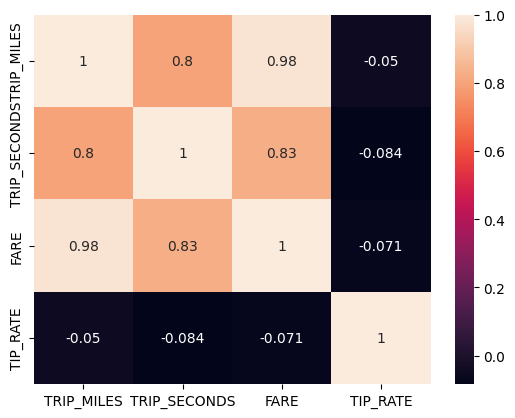

In [42]:
corr_matrix = training_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)

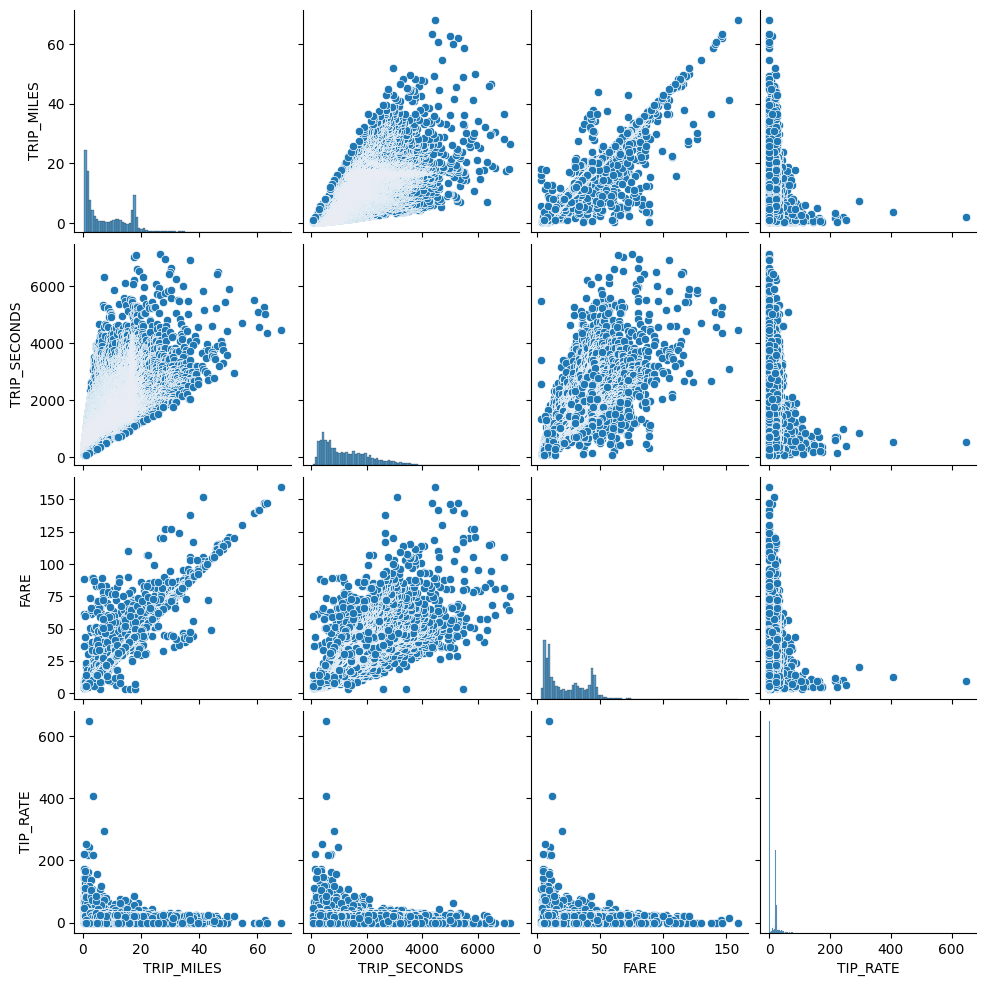

In [43]:
sns.pairplot(training_df)

# Training

In [50]:
x = training_df['TRIP_MILES']
y = training_df['FARE']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

### Full Batch

[np.float64(14.347847151253507),
 np.float64(14.347289218448713),
 np.float64(14.346732250314721),
 np.float64(14.346176245183601),
 np.float64(14.345621201390323)]

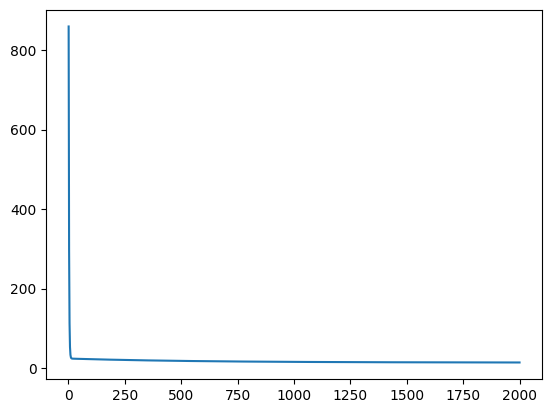

In [89]:
epochs = 2000
w = 0
b = 0
lr = 0.001

loss_track = []
for i in range(epochs):
    y_hat = w * x + b
    loss = np.mean((y_hat - y)**2)
    loss_track.append(loss)
    dw = np.mean((y_hat - y)*2*x)
    db = np.mean((y_hat - y)*2)
    w = w - lr * dw
    b = b - lr * db

plt.plot(range(1,epochs+1), loss_track)
loss_track[-5:]

In [90]:
print(w)
print(b)

2.3368091734607614
4.163243477801289


In [91]:
y_pred = w * x_test + b

In [92]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)

In [93]:
print(mse)
print(mae)
print(r2)

15.096401971887456
1.5177015659165425
0.9489648977704042
